## DHARTI SARVAIYA

## Data Science And Business Analytics Intern @ Spark Foundation(TSF)

### Perform 'Exploratory Data Analysis' on dataset 'Terrorism'

#### As a security/defense analyst, try to find out the hot zone of terrorism.

In [1]:
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data= pd.read_csv('D:/The Sparks Foundation/Task 4/Global Terrorism/globalterrorismdb.csv',low_memory=False)
print('data fetch successfully')
data.head()

data fetch successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
data.shape

(181691, 135)

In [5]:
data.duplicated().sum()

0

In [6]:
data.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


## using histogram to represent relationship between all features

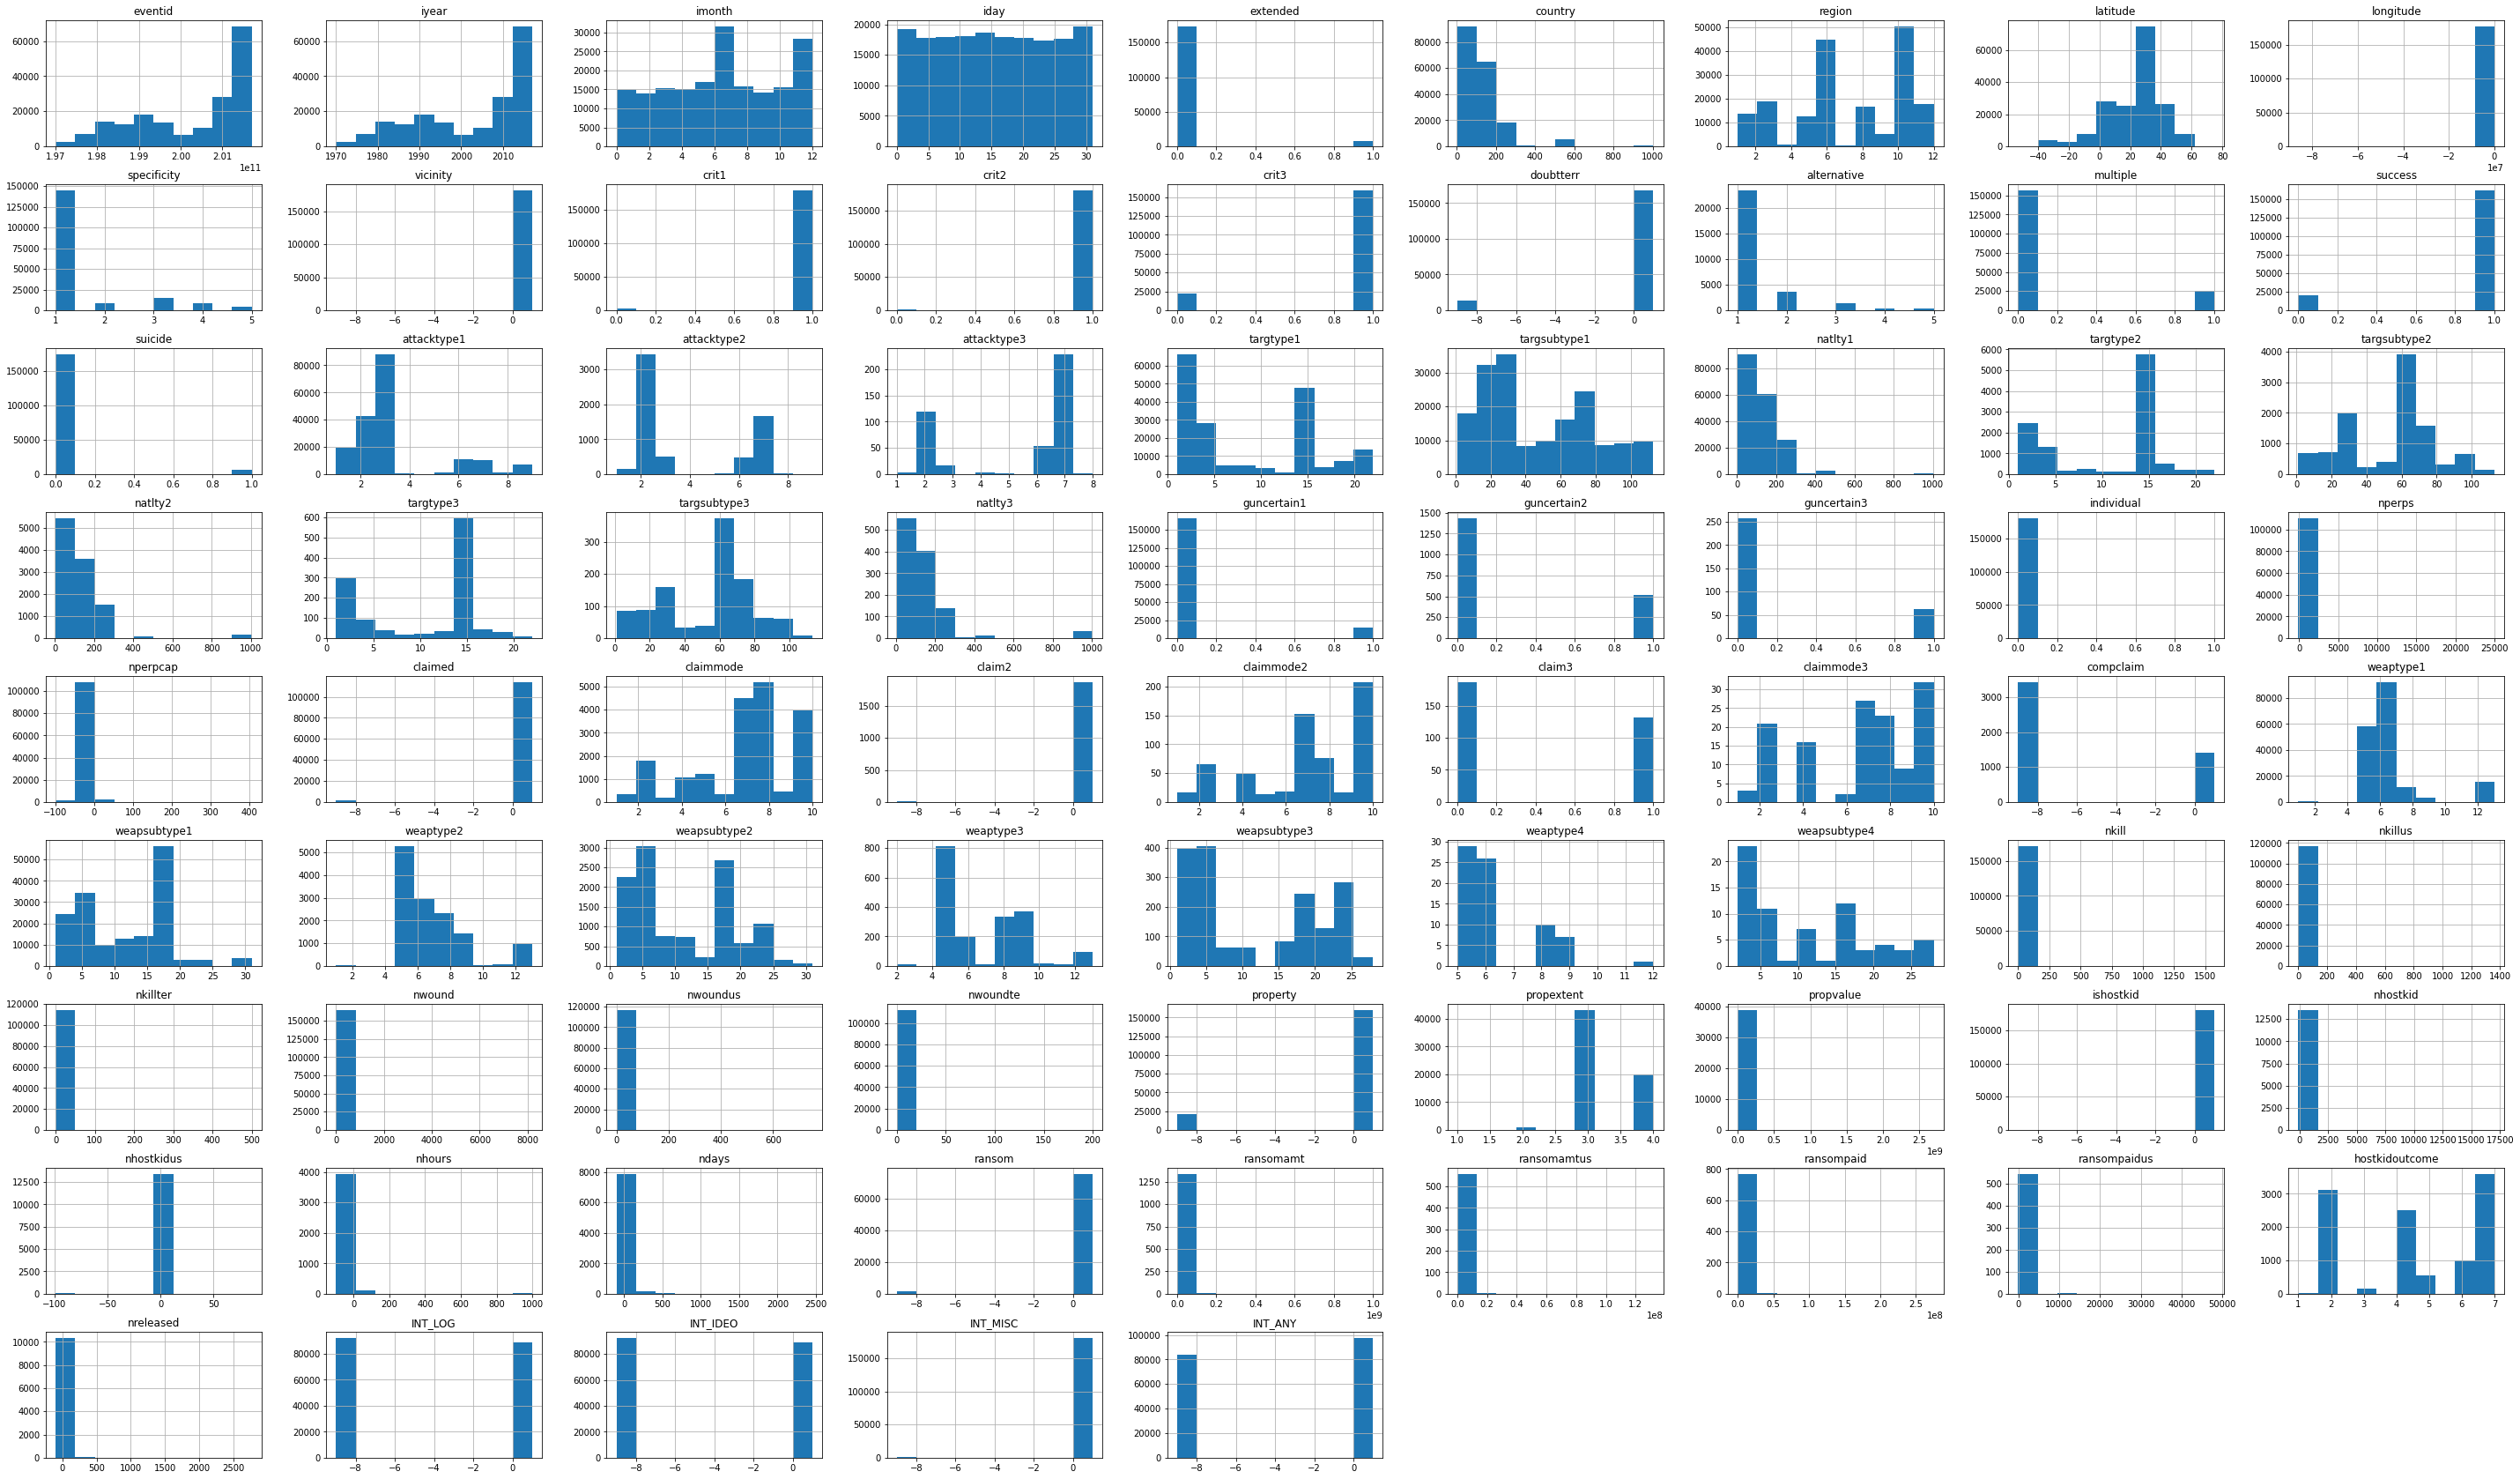

In [8]:
data.hist(figsize=(50,30))
plt.show()

## counties affected by terrorist attacks

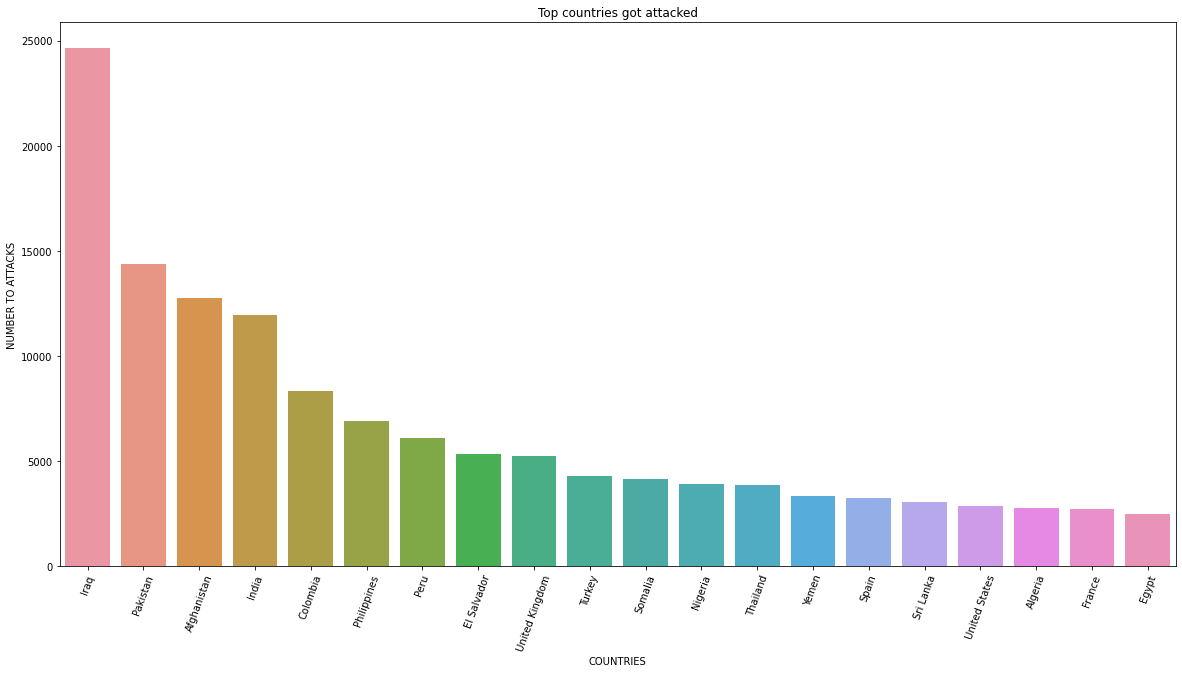

In [9]:
data['country'].value_counts()
plt.figure(figsize=(20,10))
sn.barplot(x=data['country_txt'].value_counts()[:20].index,y=data['country_txt'].value_counts()[:20].values)
plt.title('Top countries got attacked')
plt.xticks(rotation=70)
plt.xlabel('COUNTRIES')
plt.ylabel('NUMBER TO ATTACKS')
plt.show()

## region atteck by terrorist attacks

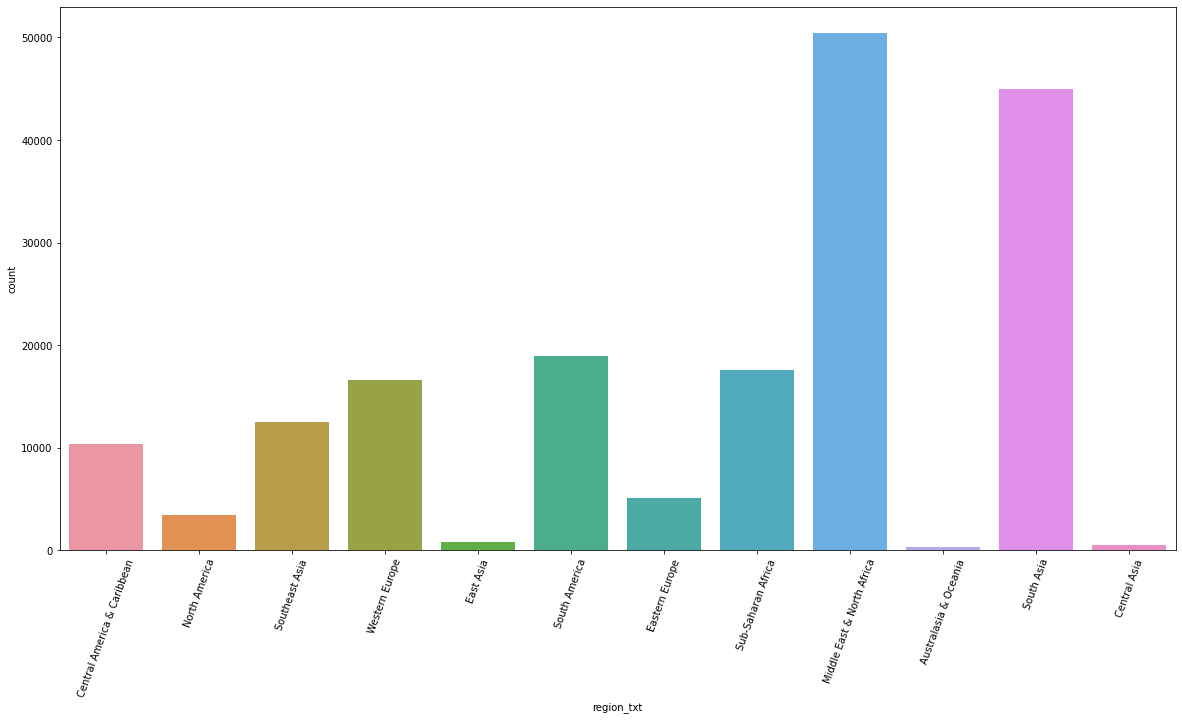

In [10]:
data['region_txt'].value_counts()
plt.figure(figsize=(20,10))
sn.countplot(x='region_txt',data=data)
plt.xticks(rotation=70)
plt.show()

In [11]:
data['city'].value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
GaRankuwa       1
El Floug        1
Bawegre         1
Dasini          1
Rudhum          1
Name: city, Length: 36674, dtype: int64

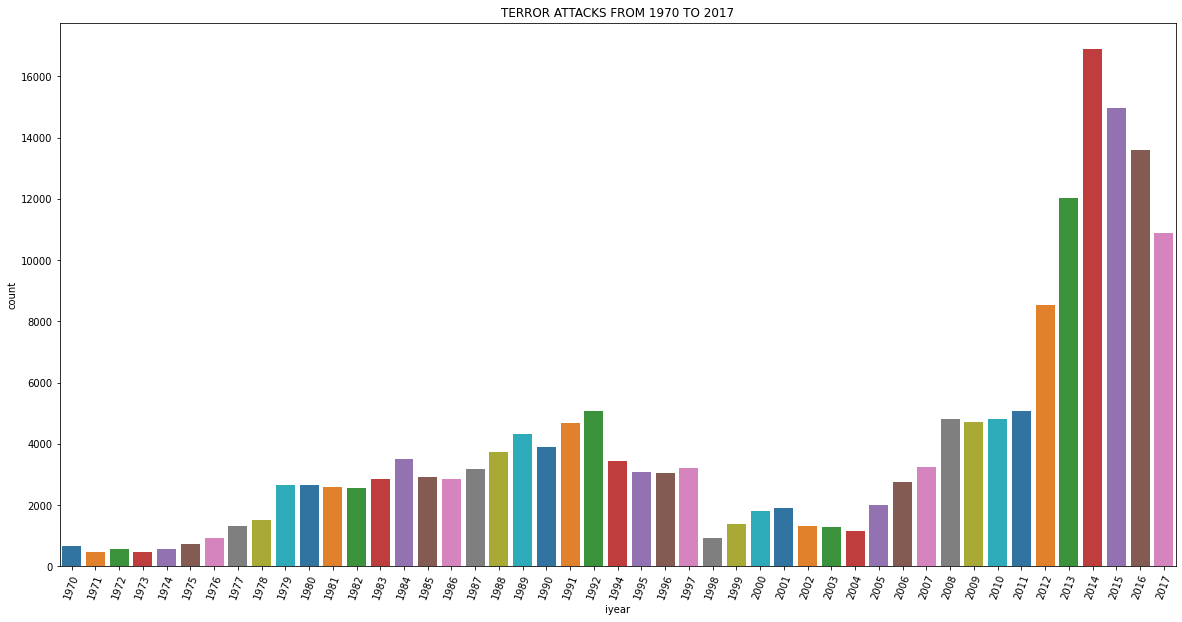

In [12]:
plt.subplots(figsize=(20,10))
sn.countplot(x='iyear',data=data,palette='tab10')
plt.xticks(rotation=70)
plt.title('TERROR ATTACKS FROM 1970 TO 2017')
plt.show()

## type of attack used by terrorists

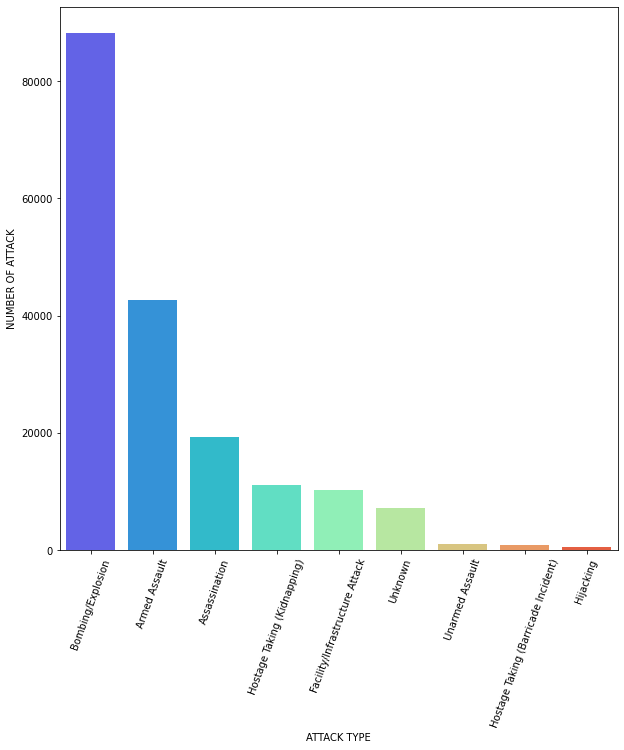

In [13]:
plt.figure(figsize=(10,10))
sn.countplot(x=data['attacktype1_txt'],order=data['attacktype1_txt'].value_counts().index,palette='rainbow')
plt.xticks(rotation=70)
plt.xlabel('ATTACK TYPE')
plt.ylabel('NUMBER OF ATTACK')
plt.show()

## attacks target

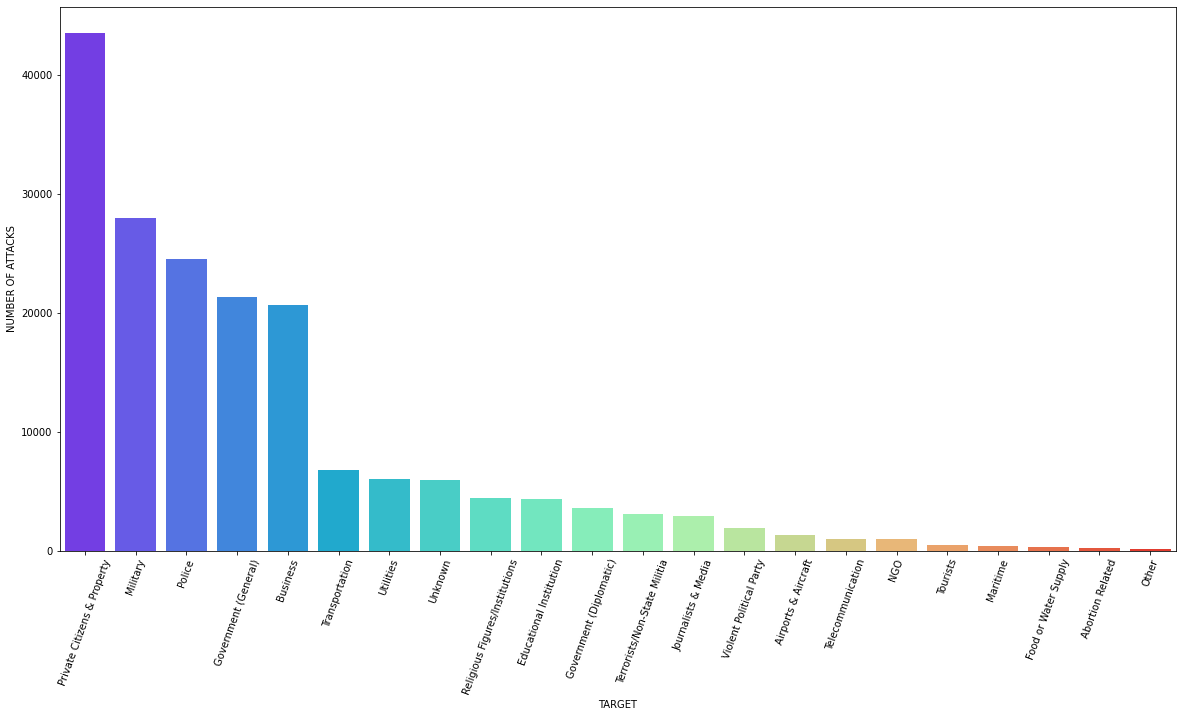

In [14]:
plt.figure(figsize=(20,10))
sn.countplot(x=data['targtype1_txt'],order=data['targtype1_txt'].value_counts().index,palette='rainbow')
plt.xticks(rotation=70)
plt.xlabel('TARGET')
plt.ylabel('NUMBER OF ATTACKS')
plt.show()


## name of group attacks terrorist

Text(0, 0.5, 'TOTAL NUMBER OF ATTACKS')

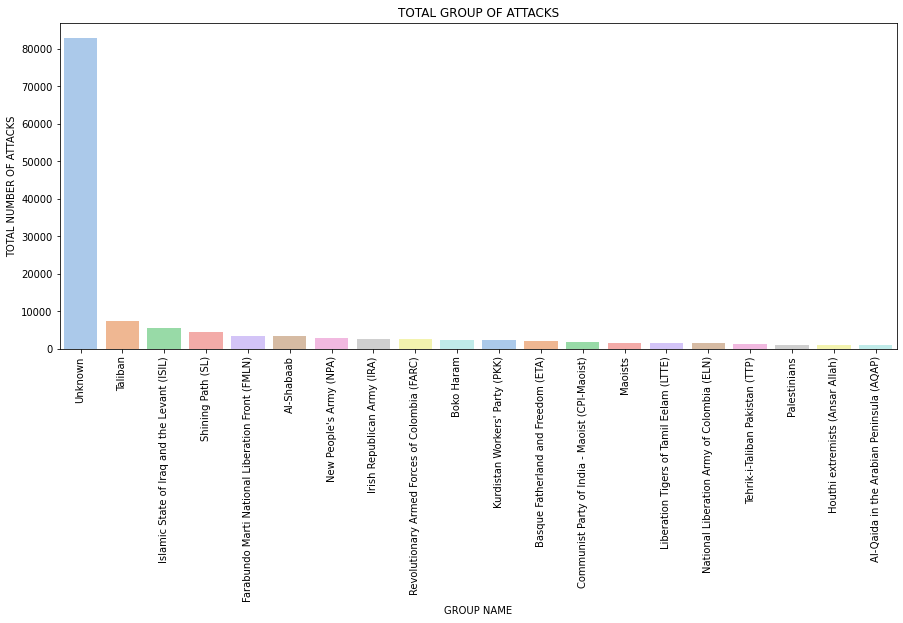

In [15]:
plt.figure(figsize=(15,6))
sn.barplot(x=data['gname'].value_counts()[:20].index , y=data['gname'].value_counts()[:20].values,palette='pastel')
plt.xticks(rotation=90)
plt.title('TOTAL GROUP OF ATTACKS')
plt.xlabel('GROUP NAME')
plt.ylabel('TOTAL NUMBER OF ATTACKS')

## cities affected

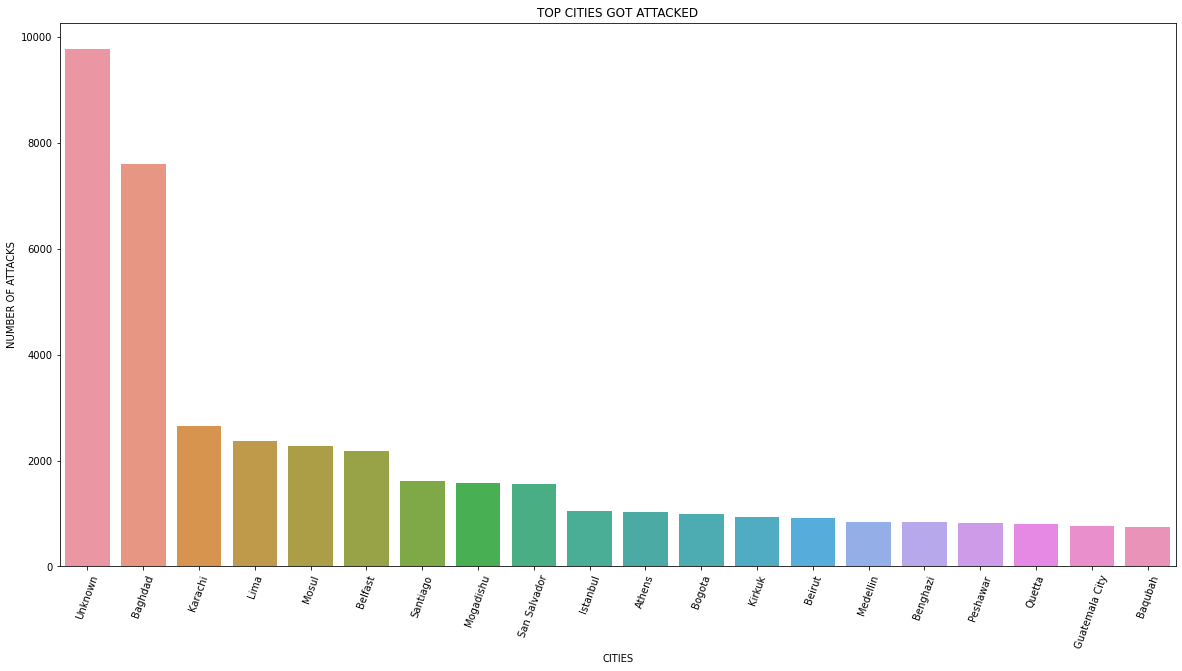

In [16]:
data['city'].value_counts()
plt.figure(figsize=(20,10))
sn.barplot(x=data['city'].value_counts()[:20].index , y=data['city'].value_counts()[:20].values)
plt.title('TOP CITIES GOT ATTACKED')
plt.xticks(rotation=70)
plt.xlabel('CITIES')
plt.ylabel('NUMBER OF ATTACKS')
plt.show()

## weapon used for supporting the attack type visual

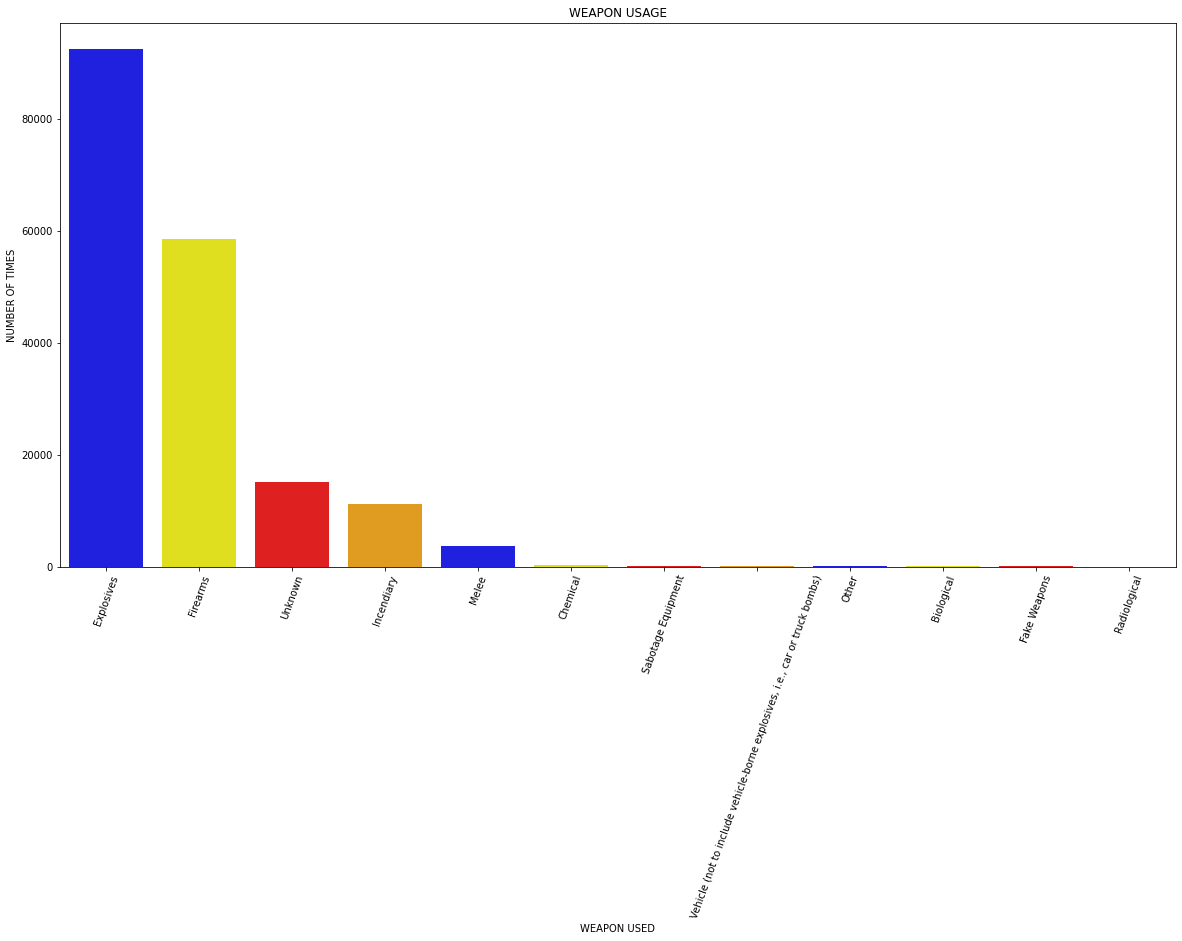

In [17]:
data['weaptype1_txt'].value_counts()
plt.figure(figsize=(20,10))
color=['blue','yellow','red','orange']
sn.barplot(x=data['weaptype1_txt'].value_counts()[:20].index , y=data['weaptype1_txt'].value_counts()[:20].values,palette=color)
plt.title('WEAPON USAGE')
plt.xticks(rotation=70)
plt.xlabel('WEAPON USED')
plt.ylabel('NUMBER OF TIMES')
plt.show()

In [ ]:
'''
OBSERVATION

-> EI SALVADOR and UNITED KINGDOM are most attacked countries
-> WESTERN EUROPE and CENTRAL AMERICA are most attacked region
-> there was growth terriorist attack from 1970 to 1981
-> EXPLOSIVE and FIREARMS are most used weapon and attack type used by terrorist attack
-> BUSINESS and PRIVATE CITIZEN & PROPERTY were most targeted during terrorist attack
-> most number of attacks were done by unknown group or not an group terrorist
-> BELLFAST and SAN SALVADOR are the most attack cities 


'''
#THANK YOU...... !!!!!